In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [17]:
# !pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [18]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

ct = ColumnTransformer([("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
                                        make_column_selector(dtype_include=object))
                            ],
                                        remainder = "passthrough")

penguins_pipeline = Pipeline([
        ("preprocessing", ct)]
)

penguins_pipeline.fit(X)

X_dummified = penguins_pipeline.named_steps["preprocessing"].transform(X)
transformed_df = pd.DataFrame(X_dummified, columns=penguins_pipeline.named_steps["preprocessing"].get_feature_names_out())
transformed_df

,dummify__species_Chinstrap,dummify__species_Gentoo,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_male,remainder__bill_length_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,0.0,0.0,0.0,1.0,1.0,39.1,181.0,3750.0,2007.0
1,0.0,0.0,0.0,1.0,0.0,39.5,186.0,3800.0,2007.0
2,0.0,0.0,0.0,1.0,0.0,40.3,195.0,3250.0,2007.0
3,0.0,0.0,0.0,1.0,0.0,36.7,193.0,3450.0,2007.0
4,0.0,0.0,0.0,1.0,1.0,39.3,190.0,3650.0,2007.0
...,...,...,...,...,...,...,...,...,...
328,1.0,0.0,1.0,0.0,1.0,55.8,207.0,4000.0,2009.0
329,1.0,0.0,1.0,0.0,0.0,43.5,202.0,3400.0,2009.0
330,1.0,0.0,1.0,0.0,1.0,49.6,193.0,3775.0,2009.0
331,1.0,0.0,1.0,0.0,1.0,50.8,210.0,4100.0,2009.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [19]:
# Model 1: Multiple Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr_pipeline = Pipeline([
        ("preprocessing", ct),
        ("regression", LinearRegression())
    ])

lr_fit = lr_pipeline.fit(X_train, y_train)

# Predictions for train and test sets
y_train_pred = lr_fit.predict(X_train)
y_test_pred = lr_fit.predict(X_test)

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)

In [20]:
# Model 2: kNN Model where K = 3
knn3_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn3", KNeighborsRegressor(n_neighbors=3))
    ])

knn3_fit = knn3_pipeline.fit(X_train, y_train)

knn3_train_pred = knn3_fit.predict(X_train)
knn3_test_pred = knn3_fit.predict(X_test)

knn3_train_mse = mean_squared_error(y_train, knn3_train_pred)
knn3_test_mse = mean_squared_error(y_test, knn3_test_pred)

In [24]:
# Model 3: kNN Model where K = 8
knn8_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn8", KNeighborsRegressor(n_neighbors=8))
    ])

knn8_fit = knn8_pipeline.fit(X_train, y_train)

knn8_train_pred = knn8_fit.predict(X_train)
knn8_test_pred = knn8_fit.predict(X_test)

knn8_train_mse = mean_squared_error(y_train, knn8_train_pred)
knn8_test_mse = mean_squared_error(y_test, knn8_test_pred)

In [22]:
# Model 4: Decision Tree Model
dt_pipeline = Pipeline([
        ("preprocessing", ct),
        ("decision_tree", DecisionTreeRegressor(random_state=1))
    ])

dt_fit = dt_pipeline.fit(X_train, y_train)

dt_train_pred = dt_fit.predict(X_train)
dt_test_pred = dt_fit.predict(X_test)

dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)

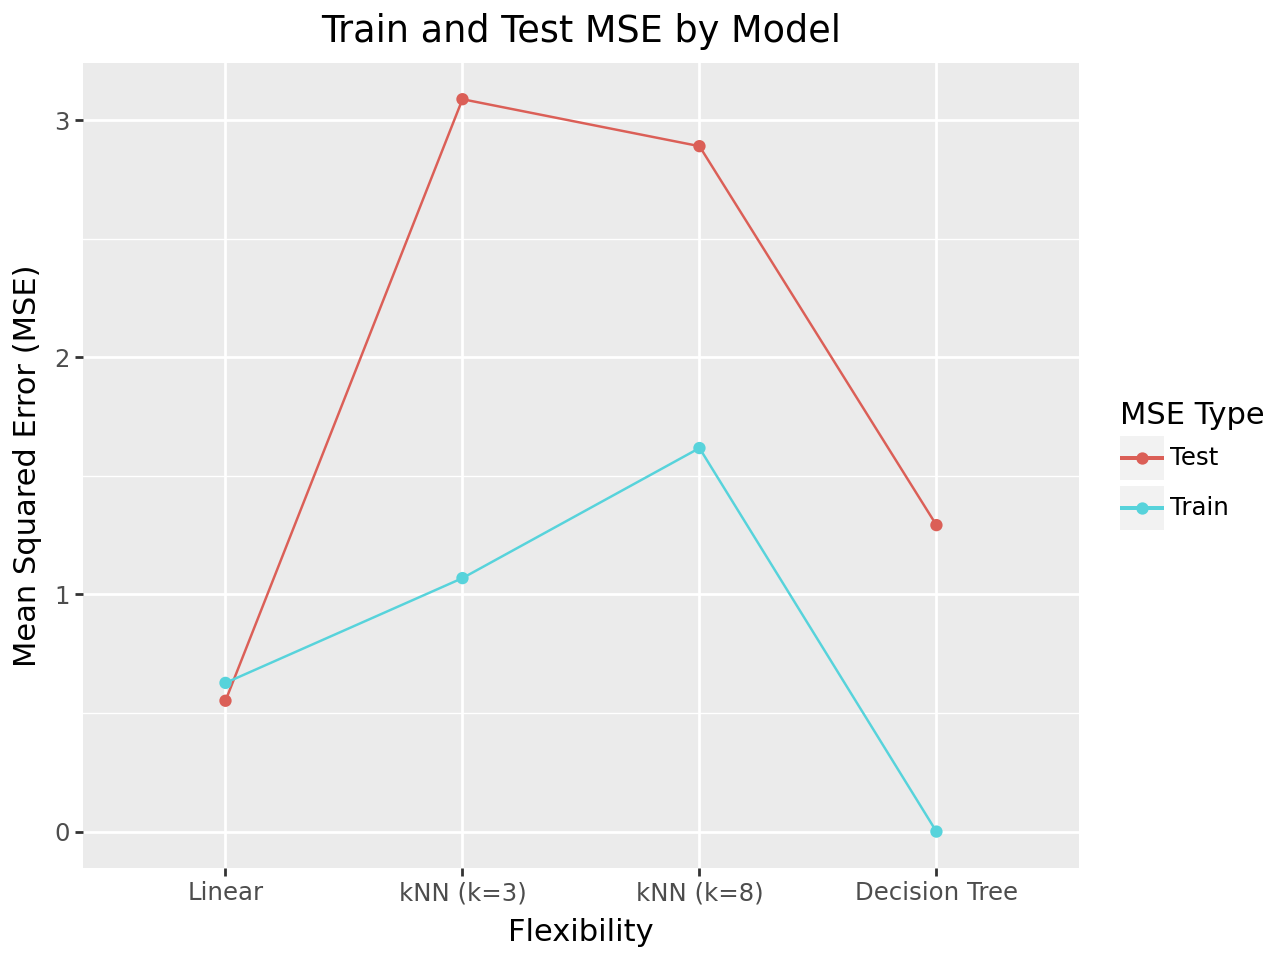

In [26]:
plot_df = pd.DataFrame({
    "Model": ["Linear", "kNN (k=3)", "kNN (k=8)", "Decision Tree"],
    "Train": [lr_train_mse, knn3_train_mse, knn8_train_mse, dt_train_mse],
    "Test": [lr_test_mse, knn3_test_mse, knn8_test_mse, dt_test_mse]
})

plot_df_long = plot_df.melt(id_vars="Model", value_vars=["Train", "Test"],
                            var_name="MSE Type", value_name="MSE")

(ggplot(plot_df_long, aes(x="Model", y="MSE", color="MSE Type", group="MSE Type")) +
    geom_line() +
    geom_point() +
    labs(title="Train and Test MSE by Model", y="Mean Squared Error (MSE)", x="Flexibility") +
    scale_x_discrete(limits=["Linear", "kNN (k=3)", "kNN (k=8)", "Decision Tree"]))


The plot shows that the Linear Regression model has relatively balanced train and test errors. The k-NN model with k=3 overfits, as seen in its low train error but high test error, while increasing k to 8 reduces overfitting but increases test error slightly. The Decision Tree has low train error but still a moderate test error, suggesting some overfitting.